In [31]:
from read_simulation_data.get_foreground_variable import get_foreground_variable
from read_simulation_data.get_background_variable import get_background_variable
from read_simulation_data.get_num_snaps import get_num_snaps
from read_simulation_data.get_info import get_info
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import numpy as np
import os
import visualize_background as vb
import astropy.units as u
from matplotlib.animation import FuncAnimation

from plot_simulation_data.plot_foreground_variable_2D import plot_foreground_variable_2D
from plot_simulation_data.plot_foreground_variable_1D import plot_foreground_variable_1D
from plot_simulation_data.plot_all_foreground_variables_2D import plot_all_foreground_variables_2D
from plot_simulation_data.plot_all_foreground_variables_1D import plot_all_foreground_variables_1D
from plot_simulation_data.animate_all_foreground_variables_1D import animate_all_foreground_variables_1D
from plot_simulation_data.animate_all_foreground_variables_2D import animate_all_foreground_variables_2D
from plot_simulation_data.plot_foreground_variable_cross_section_3D import plot_foreground_variable_cross_section_3D
from plot_simulation_data.plot_all_foreground_variables_cross_section_3D import plot_all_foreground_variables_cross_section_3D
from plot_simulation_data.animate_all_foreground_variables_across_axis_3D import animate_all_foreground_variables_across_axis_3D

from plot_simulation_data.plot_conservation_of_mass_2D import plot_conservation_of_mass_2D

import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter

DATA_FOLDER = "/mn/stornext/d10/data/tabjone/data/"
R_SUN = 6.957e10
SAVE_FOLDER = 'data/'

In [2]:
RUN_NAME = "meeting_bubbles/"

In [32]:
def get_column_of_variable(folder, snapshot_number, variable_key, column_number):
    variable, unit, t = get_foreground_variable(folder, snapshot_number, variable_key)
    variable = variable*u.Unit(unit)

    t = t*u.s

    return variable[:,column_number], t

def plot_column_of_variable_2D(folder, ax, snap_number, key, **kwargs):
    _, _, grid_info_dict = get_info(folder)
    if 'column_number' not in kwargs:
        column_number = int((grid_info_dict['ny'][0]-1)/2)
    else:
        column_number = kwargs['column_number']

    variable, t = get_column_of_variable(folder, snap_number, key, column_number)
    
    r, unit = get_background_variable(folder, 'r')
    r = r*u.Unit(unit)

    ax.plot(r/R_SUN, variable, label='t = {:.2f} [h]'.format(t.to(u.hour).value))
    ax.set_xlabel('r/R_sun')
    ax.set_ylabel('{key} [{unit}]'.format(key=key, unit=variable.unit))

    return 0, t

def plot_all_column_2D(folder, fig, snap_number, **kwargs):

    _, _, grid_info_dict = get_info(folder)
     # Handle kwargs
    if kwargs.get("title_size") == None:
        title_size = 15
    else:
        title_size = kwargs.get("title_size")

    dy, unit = grid_info_dict['dy']
    dy = dy*u.Unit(unit)

    dy = dy.to(u.R_sun)

    if kwargs.get("column_number") == None:
        kwargs["column_number"] = int((grid_info_dict['ny'][0]-1)/2)

    column_position = dy.value * kwargs["column_number"]

    gs = gridspec.GridSpec(2, 6, width_ratios=[1, 0.01, 1, 0.01, 1, 0.01], wspace=0.6, hspace=0.3)

    # Order of keys for plotting
    plot_order = ["T1", "rho1", "vy", "p1", "s1", "vz"]

    for idx, key in enumerate(plot_order):
        i, j = divmod(idx, 3)  # Convert 1D index to 2D indices
        # Create the subplot using GridSpec indexing
        ax = fig.add_subplot(gs[i, 2*j])

        # Plot the foreground variable
        im, t = plot_column_of_variable_2D(folder, ax, snap_number, key, **kwargs)
        t = t.to(u.hour)

    # Title for the entire plot with the time
    fig.suptitle(f"t={t.value:.1f} [{t.unit.to_string(format='latex_inline')}], x={column_position:.2f} [$R_\\odot$]", fontsize=title_size, y=0.96)

def animate_all_column_2D(folder, save=False, save_name=None, fps=4, save_interval=10, anim_interval=250, **kwargs):

    fig = plt.figure(figsize=(16, 9))  # Create a figure
    num_snaps = get_num_snaps(folder)

    def init_animation():
        """Initialize the plots for each frame."""
        plot_all_column_2D(folder, fig, 0, **kwargs)

    def update_animation(snap_number):
        """Update the plots for each frame."""
        for ax in fig.get_axes():
            ax.clear()  # Clear previous data
        fig.clear()
        plot_all_column_2D(folder, fig, snap_number, **kwargs)

    anim = FuncAnimation(fig, update_animation, interval=anim_interval, frames=range(0,num_snaps, save_interval), init_func=init_animation)

    if save:
        anim.save(save_name, writer='ffmpeg', fps=fps, extra_args=['-vcodec', 'libx264'])
    else:
        plt.show()

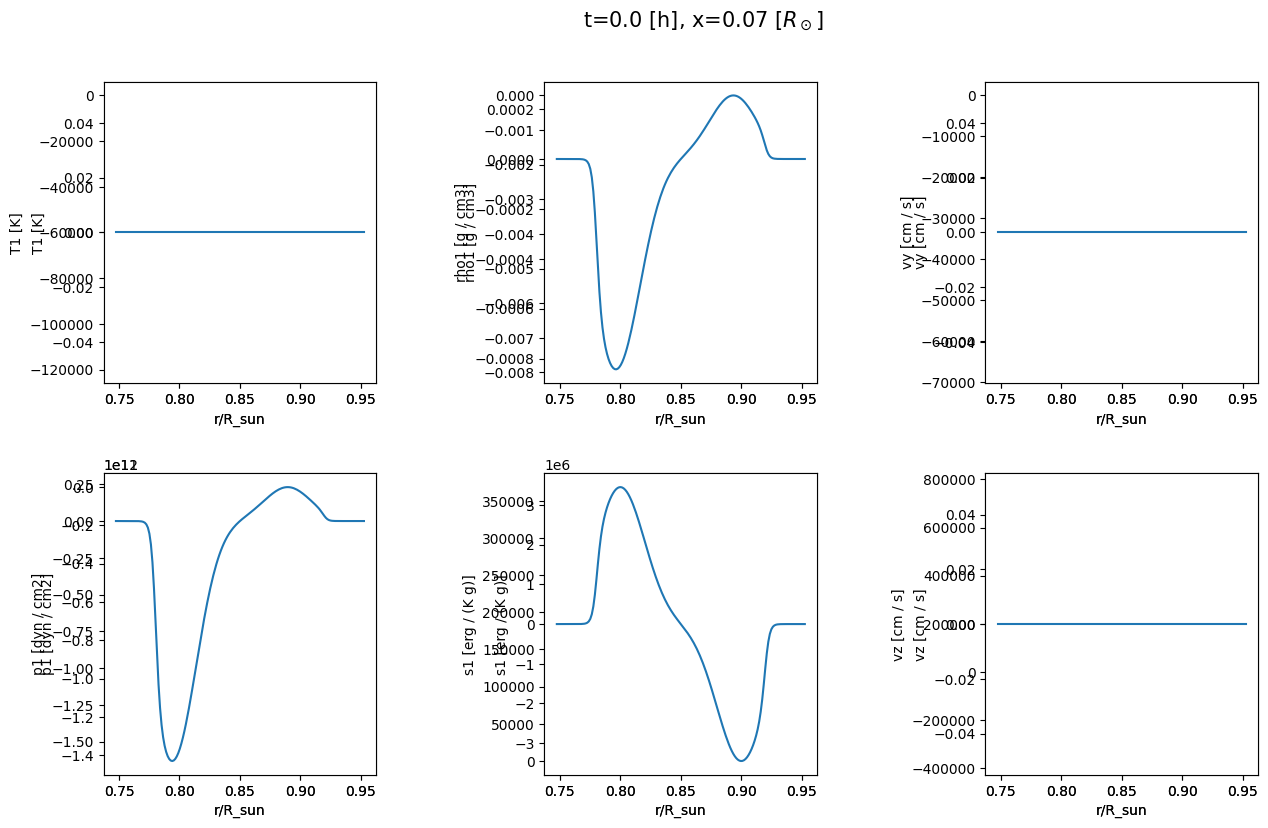

In [224]:
RUN_NAME = "meeting_bubbles_s1_diffusion_lax/"

if not os.path.exists(SAVE_FOLDER+RUN_NAME):
    os.makedirs(SAVE_FOLDER+RUN_NAME)

animate_all_column_2D(DATA_FOLDER+RUN_NAME, save=True, save_name=SAVE_FOLDER+RUN_NAME+'column.mp4', fps=4, save_interval=10)

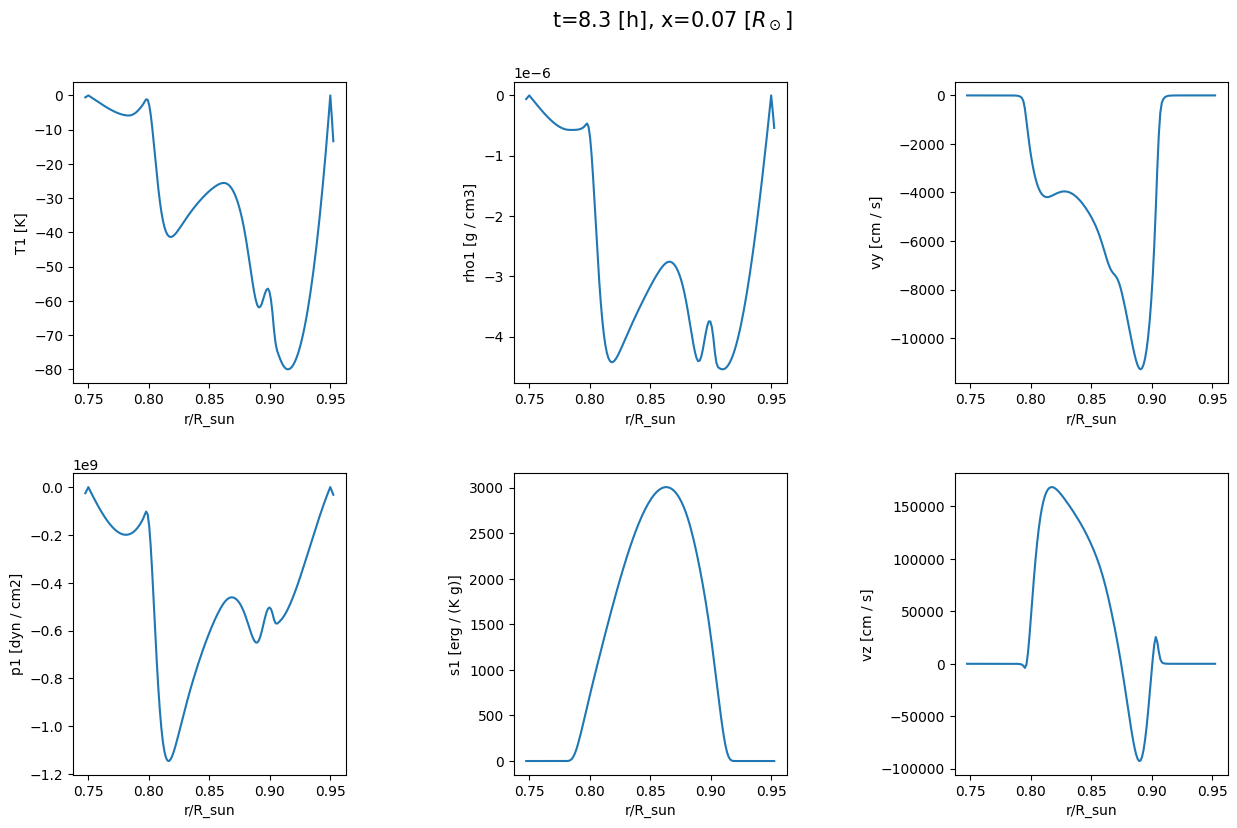

In [223]:
RUN_NAME = "meeting_bubbles_s1_diffusion_lax/"

plot_all_column_2D(DATA_FOLDER+RUN_NAME, plt.figure(figsize=(16, 9)), 2730)

In [204]:
RUN_NAME = "meeting_bubbles_s1_diffusion_lax/"

plot_all_column_2D(DATA_FOLDER+RUN_NAME, plt.figure(figsize=(16, 9)), 1600)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/mn/stornext/d10/data/tabjone/data/meeting_bubbles_s1_diffusion_lax/info.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

<Figure size 1600x900 with 0 Axes>

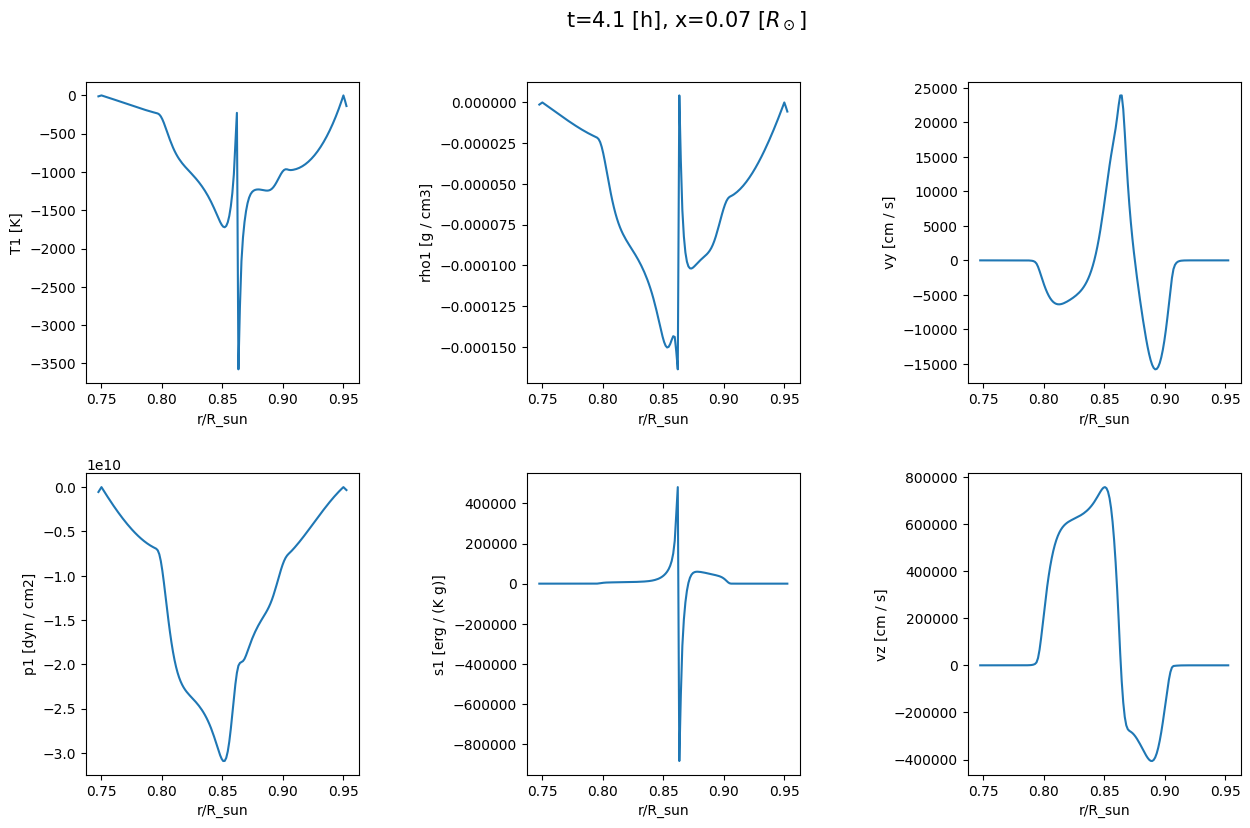

In [199]:
plot_all_column_2D(DATA_FOLDER+RUN_NAME, plt.figure(figsize=(16, 9)), 1400)

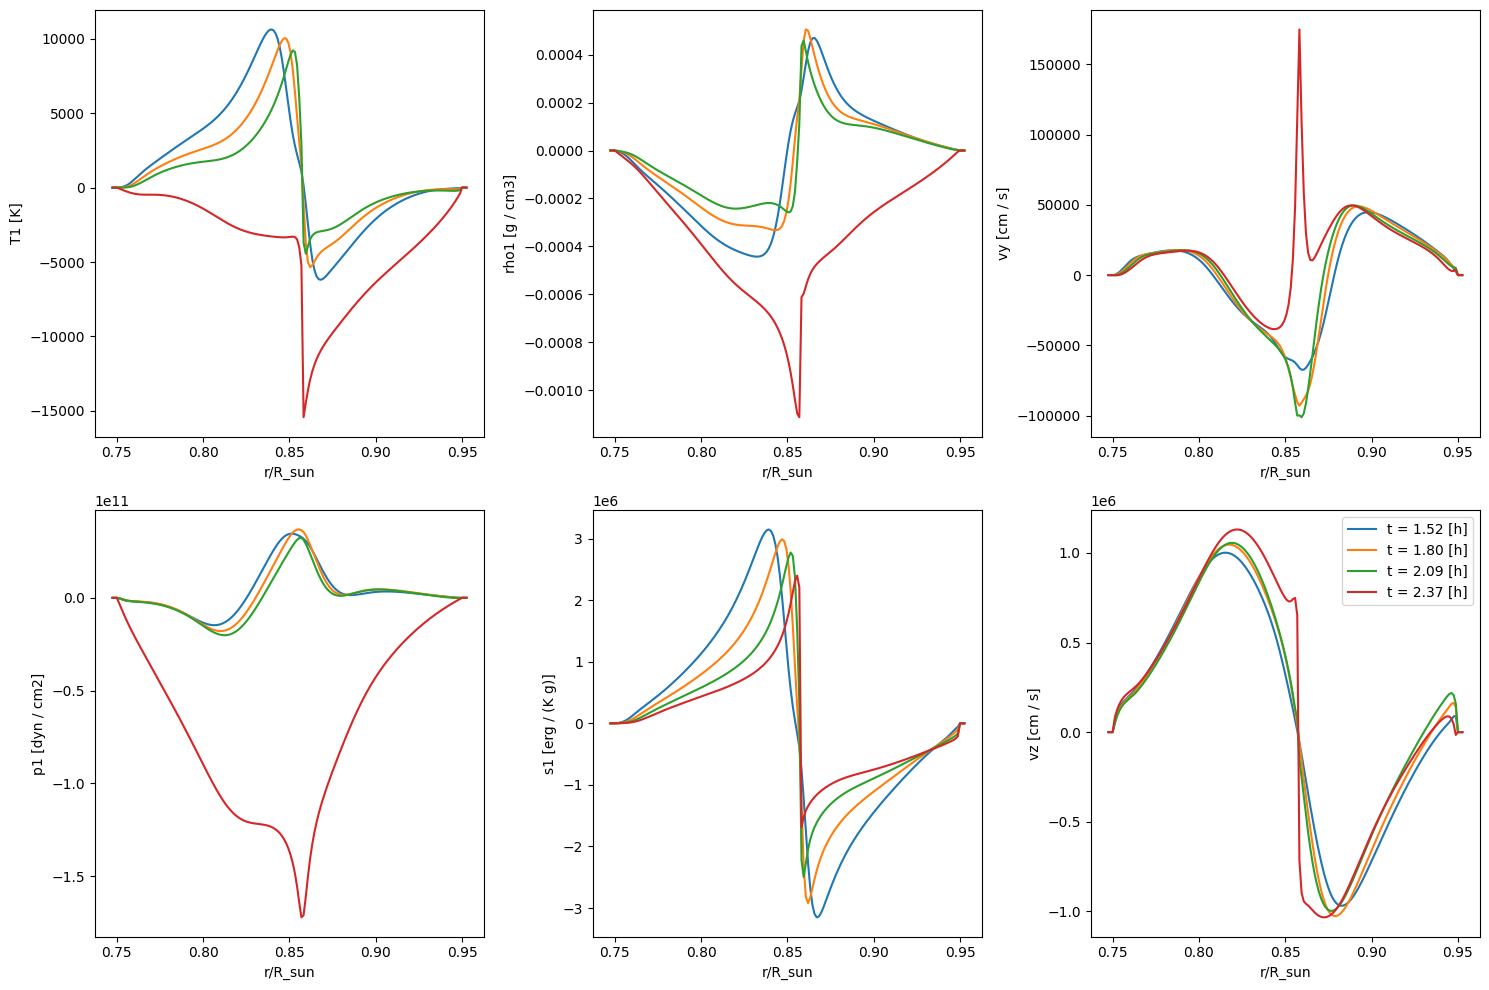

In [117]:
RUN_NAME = 'meeting_bubbles/'

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Adjusted for better visibility
variable_keys = ['T1', 'rho1', 'vy', 'p1', 's1', 'vz']  # Example variable keys

snapshot_indices = [500, 600, 700, 800]


for snap in snapshot_indices:
    plot_counter = 0
    for variable_key in variable_keys:
        row_idx = plot_counter // 3
        col_idx = plot_counter % 3
        ax = axs[row_idx, col_idx]
        
        # Plotting the variable for the snapshot
        plot_column_of_variable_2D(DATA_FOLDER + RUN_NAME, ax, snap, variable_key)
        
        plot_counter += 1
    plt.legend()

fig.tight_layout()
plt.savefig("data/meeting_bubbles/column.png")